In [15]:
# plan data; load arrs, pgv4 new
import jax
import jax.numpy as jnp
from jax import jit
import jax.random as rnd
import numpy as np
import os

def load_large_outputs(str_):
    path_ = os.path.dirname(os.getcwd()) + '/sc_project/large_outputs/' # '/sc_project/test_data/' # Path(__file__).resolve().parents[1]
    with open(path_+str_,'rb') as file_:
        # param = pickle.load(file_)
        param_ = jnp.load(file_,allow_pickle=True)
    return param_

file_ =  'outer_loop_pg_new_v4f_test_31_10-211852.pkl'
other = load_large_outputs(file_)
(r_arr,rp_arr,sample_arr,mask_arr,pos_plan_arr,pos_arr,dot_arr,policy_arr,hs_arr,hv_arr,vec_ind_arr,act_ind_arr) = other
print('r_arr.shape=',r_arr.shape,'rp_arr.shape=',rp_arr.shape,'sample_arr.shape=',sample_arr.shape,'mask_arr.shape=',mask_arr.shape,'\n','pos_plan_arr.shape=',pos_plan_arr.shape,'pos_arr.shape=',pos_arr.shape,'dot_arr.shape=',dot_arr.shape,'policy_arr.shape=',policy_arr[0].shape,'\n','hs_arr=',hs_arr.shape,'hv_arr=',hv_arr.shape)
print('r_tot=',np.mean(np.sum(r_arr,axis=1)))

r_arr.shape= (500, 60) rp_arr.shape= (500, 60) sample_arr.shape= (500, 60) mask_arr.shape= (500, 60) 
 pos_plan_arr.shape= (500, 61, 2) pos_arr.shape= (500, 61, 2) dot_arr.shape= (500, 61, 2) policy_arr.shape= (500, 60, 81) 
 hs_arr= (500, 60, 100) hv_arr= (500, 60, 300)
r_tot= 6.031161


In [16]:
# noplan data; load arrs, pgv4 new
import jax
import jax.numpy as jnp
from jax import jit
import jax.random as rnd
import numpy as np
import os

def load_large_outputs(str_):
    path_ = os.path.dirname(os.getcwd()) + '/sc_project/large_outputs/' # '/sc_project/test_data/' # Path(__file__).resolve().parents[1]
    with open(path_+str_,'rb') as file_:
        # param = pickle.load(file_)
        param_ = jnp.load(file_,allow_pickle=True)
    return param_

file_ = 'outer_loop_pg_new_v4f_test_31_10-211936.pkl'
other = load_large_outputs(file_)
(r_arr_np,rp_arr_np,sample_arr_np,mask_arr_np,pos_plan_arr_np,pos_arr_np,dot_arr_np,policy_arr_np,hs_arr_np,hv_arr_np,vec_ind_arr_np,act_ind_arr_np) = other
print('r_arr.shape=',r_arr_np.shape,'rp_arr.shape=',rp_arr_np.shape,'sample_arr.shape=',sample_arr_np.shape,'mask_arr.shape=',mask_arr_np.shape,'\n','pos_plan_arr.shape=',pos_plan_arr_np.shape,'pos_arr.shape=',pos_arr_np.shape,'dot_arr.shape=',dot_arr_np.shape,'policy_arr.shape=',policy_arr_np[0].shape,'\n','hs_arr=',hs_arr_np.shape,'hv_arr=',hv_arr_np.shape)
print('r_tot=',np.mean(np.sum(r_arr_np,axis=1)))

r_arr.shape= (500, 60) rp_arr.shape= (500, 60) sample_arr.shape= (500, 60) mask_arr.shape= (500, 60) 
 pos_plan_arr.shape= (500, 61, 2) pos_arr.shape= (500, 61, 2) dot_arr.shape= (500, 61, 2) policy_arr.shape= (500, 60, 81) 
 hs_arr= (500, 60, 100) hv_arr= (500, 60, 300)
r_tot= 6.187753


In [17]:
# binned sort
%matplotlib inline

# Calculate dot speeds
dot_diffs = np.diff(dot_arr, axis=1)
dot_speeds = np.linalg.norm(dot_diffs, axis=2)
mean_dot_speeds = np.mean(dot_speeds, axis=1)

# Define speed bins
speed_bins = np.linspace(np.min(mean_dot_speeds), np.max(mean_dot_speeds), num=5)  # Assuming 4 bins
speed_bin_centers = (speed_bins[:-1] + speed_bins[1:]) / 2

# Loop through speed bins
for i in range(len(speed_bins) - 1):
    mask = (mean_dot_speeds >= speed_bins[i]) & (mean_dot_speeds < speed_bins[i + 1])
    
    masked_indices = np.where(mask)[0]  # Keep track of original indices
    masked_decisions = sample_arr[mask]
    masked_rewards = r_arr[mask]
    
    total_rewards = np.sum(masked_rewards, axis=1)
    planning_rates = np.mean(masked_decisions, axis=1)
    product_scores = total_rewards * planning_rates

    # Get the sorted indices in descending order
    reward_indices = np.argsort(total_rewards)[::-1]
    planning_indices = np.argsort(planning_rates)[::-1]
    product_indices = np.argsort(product_scores)[::-1]

    # Top 5 indices for rewards and planning rates
    top_reward_indices = reward_indices[:5]
    top_planning_indices = planning_indices[:50]
    top_product_indices = product_indices[:10]
    
    # Map back to original indices
    original_top_reward_indices = masked_indices[top_reward_indices]
    original_top_planning_indices = masked_indices[top_planning_indices]
    original_top_product_indices = masked_indices[top_product_indices]
    
    # Print the results
    print("top rewards for speed bin", i+1)
    for idx, original_idx in enumerate(original_top_reward_indices):
        print(f" Index: {original_idx}, Reward: {total_rewards[top_reward_indices[idx]]:.2f}")

    print("\n top plan rates for speed bin", i+1)
    for idx, original_idx in enumerate(original_top_planning_indices):
        print(f"Index: {original_idx}, Planning Rate: {planning_rates[top_planning_indices[idx]]:.2f}, reward: {np.sum(r_arr[original_idx,:]):.2f}")

    print("\n top Product Scores for speed bin", i+1)
    for idx, original_idx in enumerate(original_top_product_indices):
        print(f"Index: {original_idx}, Score: {product_scores[top_product_indices[idx]]:.2f}")
    print('----------------------')

/Users/lukej/Documents/meta_rl_ego_sim/venv3/lib/python3.8/site-packages/jax/_src/numpy/lax_numpy.py:3539: UserWarning: 'kind' argument to argsort is ignored; only 'stable' sorts are supported.
  warnings.warn("'kind' argument to argsort is ignored; only 'stable' sorts "


top rewards for speed bin 1
 Index: 225, Reward: 32.53
 Index: 155, Reward: 32.27
 Index: 191, Reward: 30.68
 Index: 240, Reward: 30.20
 Index: 76, Reward: 27.49

 top plan rates for speed bin 1
Index: 459, Planning Rate: 0.08, reward: 13.20
Index: 97, Planning Rate: 0.07, reward: 2.29
Index: 398, Planning Rate: 0.05, reward: 11.03
Index: 262, Planning Rate: 0.05, reward: 7.38
Index: 476, Planning Rate: 0.03, reward: 15.65
Index: 337, Planning Rate: 0.03, reward: 11.77
Index: 309, Planning Rate: 0.03, reward: 9.56
Index: 207, Planning Rate: 0.03, reward: 1.22
Index: 202, Planning Rate: 0.03, reward: 0.22
Index: 143, Planning Rate: 0.03, reward: 0.01
Index: 475, Planning Rate: 0.02, reward: 13.73
Index: 446, Planning Rate: 0.02, reward: 15.47
Index: 425, Planning Rate: 0.02, reward: 7.46
Index: 394, Planning Rate: 0.02, reward: 1.76
Index: 360, Planning Rate: 0.02, reward: 6.09
Index: 302, Planning Rate: 0.02, reward: 21.20
Index: 297, Planning Rate: 0.02, reward: 23.39
Index: 280, Plan

In [24]:
# full ani pgv2/3 with policy heatmap

%matplotlib qt
import numpy as np
import scipy
import matplotlib.pyplot as plt
from matplotlib import gridspec
import matplotlib.animation as animation
import matplotlib.cm as cm
import matplotlib.colors
from matplotlib.patches import Ellipse
import functools
import jax.numpy as jnp
import jax.random as rnd

def gen_sc(keys,MODULES,ACTION_SPACE,PLAN_SPACE):
    index_range = jnp.arange(MODULES**2)
    x = jnp.linspace(-PLAN_SPACE,PLAN_SPACE,MODULES)
    y = jnp.linspace(-PLAN_SPACE,PLAN_SPACE,MODULES)[::-1]
    xv,yv = jnp.meshgrid(x,y)
    A_full = jnp.vstack([xv.flatten(),yv.flatten()])

    inner_mask = (jnp.abs(xv) <= ACTION_SPACE) & (jnp.abs(yv) <= ACTION_SPACE)
    A_inner_ind = index_range[inner_mask.flatten()]
    A_outer_ind = index_range[~inner_mask.flatten()]
    A_inner_perm = rnd.permutation(keys[0],A_inner_ind)
    A_outer_perm = rnd.permutation(keys[1],A_outer_ind)
    ID_ARR = jnp.concatenate((A_inner_perm,A_outer_perm),axis=0)

    VEC_ARR = A_full[:,ID_ARR]
    H1VEC_ARR = jnp.eye(MODULES**2) # [:,ID_ARR]
    SC = (ID_ARR,VEC_ARR,H1VEC_ARR)
    return SC #,prior_vec,zero_vec_index

def mod_(x):
    return (x + np.pi) % (2 * np.pi) - np.pi

def gen_vectors(m, A): # modules/neurons, aperture
    x = np.linspace(-(A-A/m), (A-A/m), m)
    x_ = np.tile(x, (m, ))
    y_ = np.repeat(np.flip(x), m)
    return np.vstack([x_, y_])

def circ_mean_var(v_pred,vec_range):
    v_clamped = np.clip(v_pred,0,None)
    x_y_coords = gen_vectors(np.int32(np.sqrt(len(v_clamped))),vec_range)
    x = x_y_coords[0,:]
    y = x_y_coords[1,:]
    z_x = v_pred*(np.cos(x) + 1j*np.sin(x))
    z_y = v_pred*(np.cos(y) + 1j*np.sin(y))
    mean_x = np.angle(np.sum(z_x)/np.sum(v_clamped))
    mean_y = np.angle(np.sum(z_y)/np.sum(v_clamped))
    circular_var_x = 1 - np.abs(np.sum(z_x) / np.sum(v_clamped))
    circular_var_y = 1 - np.abs(np.sum(z_y) / np.sum(v_clamped))
    circular_cov_matrix = np.diag([circular_var_x, circular_var_y])
    eigvals,eigvecs = np.linalg.eigh(circular_cov_matrix)
    sigma_x,sigma_y = np.sqrt(eigvals)  # no Scale factor for visualization
    return x_y_coords,x,y,mean_x,mean_y,sigma_x,sigma_y

def set_axis_properties(ax,lim,labels,title=''):
    ax.set_xlim(-lim,lim)
    ax.set_ylim(-lim,lim)
    ax.set_aspect('equal', 'box')  
    ax.set_title(title)
    ticks = np.linspace(-lim,lim,5)
    ax.set_xticks(ticks)
    ax.set_yticks(ticks)
    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)

def get_aperture_points(agent_t,aperture,density):
    x_horizontal = np.linspace(agent_t[0] - aperture, agent_t[0] + aperture, density)
    y_top = np.full(density, agent_t[1] + aperture)
    y_bottom = np.full(density, agent_t[1] - aperture)
    y_vertical = np.linspace(agent_t[1] - aperture, agent_t[1] + aperture, density)
    x_left = np.full(density, agent_t[0] - aperture)
    x_right = np.full(density, agent_t[0] + aperture)
    x_tot = np.concatenate([x_left, x_right, x_horizontal, x_horizontal])
    y_tot = np.concatenate([y_vertical, y_vertical, y_bottom, y_top])
    return x_tot,y_tot

def is_point_in_ellipse(x,y,h,k,a,b):
    ellipse_eq = ((x - h)**2)/(a ** 2) + ((y - k)**2)/(b**2)
    return ellipse_eq <= 1

def vonmises_fit(x_coords,y_coords,v_pred_vec):
    scalar = 100
    kappa_max = 2
    integer_weights = np.int32(np.round(v_pred_vec*scalar))
    x_samples = np.repeat(x_coords, integer_weights)
    y_samples = np.repeat(y_coords, integer_weights)
    kappa_x,loc_x,_ = scipy.stats.vonmises.fit(x_samples)
    kappa_y,loc_y,_ = scipy.stats.vonmises.fit(y_samples)
    kappa_x = np.min([kappa_x,kappa_max])
    kappa_y = np.min([kappa_y,kappa_max])
    log_numerator = kappa_x + kappa_y
    log_denominator = 2 * np.log(2*np.pi) + np.log(scipy.special.i0(kappa_x)) + np.log(scipy.special.i0(kappa_y))
    log_result = log_numerator - log_denominator
    mean_magnitude = np.exp(log_result)
    return kappa_x,loc_x,kappa_y,loc_y,mean_magnitude

def animate(i,r_arr,dot_arr,pos_plan_arr,pos_arr,policy_arr_vec,policy_arr_act,VEC_ARR,dot,agent_plan,agent,aperture_points_plan,aperture_points,act_space_points_plan,act_space_points,policy_scatter,L):
    
    dot.set_data(mod_(dot_arr[i, 0]), mod_(dot_arr[i, 1]))
    agent_plan.set_data(mod_(pos_plan_arr[i, 0]), mod_(pos_plan_arr[i, 1]))
    agent.set_data(mod_(pos_arr[i, 0]), mod_(pos_arr[i, 1]))

    if i == 0:
        aperture_points.set_color('green')
    else:
        aperture_points.set_color('lightgrey')

    lab = f'Frame={i}, Reward={r_arr[i]:.3f}' #, k={kappa_x:.3f},{kappa_y:.3f}'
    L.get_texts()[0].set_text(lab)

    policy_dot_sizes = np.sqrt(policy_arr_vec[i,:])
    policy_color = cm.hot(colormap_norm(policy_arr_act[i,0]))

    x_aperture_plan,y_aperture_plan = get_aperture_points(pos_plan_arr[i],APERTURE,DENSITY_DEFAULT)
    aperture_points_plan.set_offsets(np.c_[mod_(x_aperture_plan), mod_(y_aperture_plan)])
    x_aperture,y_aperture = get_aperture_points(pos_arr[i],APERTURE,DENSITY_DEFAULT)
    aperture_points.set_offsets(np.c_[mod_(x_aperture), mod_(y_aperture)])
    x_act_space_plan,y_act_space_plan = get_aperture_points(pos_plan_arr[i],ACTION_SPACE,DENSITY_ACT_PLAN)
    act_space_points_plan.set_offsets(np.c_[mod_(x_act_space_plan), mod_(y_act_space_plan)])
    x_act_space,y_act_space = get_aperture_points(pos_arr[i],ACTION_SPACE,DENSITY_ACT_PLAN)
    act_space_points.set_offsets(np.c_[mod_(x_act_space), mod_(y_act_space)])

    policy_scatter.set_offsets(mod_(pos_plan_arr[i, :] + VEC_ARR.T))
    policy_scatter.set_sizes(POLICY_DOT_SIZE*policy_dot_sizes)
    policy_scatter.set_facecolors(policy_color)
    
    return [dot,agent_plan,agent,aperture_points_plan,aperture_points,act_space_points_plan,act_space_points,policy_scatter,L]

k = 79 # 902
interval = 200 # 150
APERTURE = (1/2)*np.pi # (3/5``)*np.pi # (1/2)*np.pi # (np.sqrt(2)/2)*np.pi # np.pi/2
ACTION_FRAC = 1 # 1/2
ACTION_SPACE = ACTION_FRAC*APERTURE # np.pi/4
PLAN_FRAC_REL = 1 #3/2 # 3/2
PLAN_SPACE = PLAN_FRAC_REL*ACTION_SPACE # np.pi/2
STEPS = pos_arr.shape[1]
MODULES = 9 #
SIGMA_SCALE = 3
POLICY_DOT_SIZE = 70 # 100

ke = rnd.split(rnd.PRNGKey(0),10)
(ID_ARR,VEC_ARR,H1VEC_ARR) = gen_sc(ke,MODULES,ACTION_SPACE,PLAN_SPACE)

DENSITY_DEFAULT = 1000
DENSITY_ACT_PLAN = 15 # 10

r_arr_ = r_arr[k,:]
dot_arr_ = dot_arr[k,:,:] # [STEPS,2]
pos_plan_arr_ = pos_plan_arr[k,:,:] # [STEPS,2]
pos_arr_ = pos_arr[k,:,:] # [STEPS,2]
policy_arr_vec = policy_arr[0][k,:,:]
policy_arr_act = policy_arr[1][k,:,:]

fig = plt.figure(figsize=(8, 12))
gs = gridspec.GridSpec(3, 2, height_ratios=[1, 1, 1])
colormap_norm = matplotlib.colors.Normalize(vmin=0, vmax=1)

ax_ani = plt.subplot(gs[0:2, 0:2],aspect='equal')
set_axis_properties(ax_ani,jnp.pi,["$-\pi$", "$-\pi/2$", "0", "$\pi/2$", "$\pi$"])
agent_plan, = ax_ani.plot(mod_(pos_plan_arr_[0, 0]), mod_(pos_plan_arr_[0, 1]), color='lightgrey', marker='+', markersize=12) #, label='agent')
agent, = ax_ani.plot(mod_(pos_arr_[0, 0]), mod_(pos_arr_[0, 1]), 'k+', markersize=12) #, label='agent')
dot, = ax_ani.plot(mod_(dot_arr_[0, 0]), mod_(dot_arr_[0, 1]), 'rx', markersize=10) #, label='dot')
text_ani, = ax_ani.plot([], [], '', label=f'Frame=0, Reward=')

aperture_points = ax_ani.scatter([], [], color='lightgrey', s=1)
aperture_points_plan = ax_ani.scatter([], [], color='lightgrey', s=1)
act_space_points = ax_ani.scatter([], [], color='lightgrey', s=1)
act_space_points_plan = ax_ani.scatter([], [], color='lightgrey', s=1)

policy_color_init = cm.hot(colormap_norm(policy_arr_act[0,0])) # Assuming policy_arr_ corresponds to policy[1]
policy_dot_sizes_init = np.sqrt(policy_arr_vec[0, :])
policy_scatter = ax_ani.scatter(VEC_ARR[0, :], VEC_ARR[1, :], s=POLICY_DOT_SIZE*policy_dot_sizes_init, alpha=1, c=policy_color_init)

L=ax_ani.legend(loc='upper right')

partial_animate = functools.partial(
    animate,
    r_arr=r_arr_,
    dot_arr=dot_arr_, 
    pos_plan_arr=pos_plan_arr_,
    pos_arr=pos_arr_, 
    policy_arr_vec=policy_arr_vec,
    policy_arr_act=policy_arr_act,
    VEC_ARR=VEC_ARR,
    dot=dot, 
    agent_plan=agent_plan,
    agent=agent, 
    aperture_points_plan=aperture_points_plan,
    aperture_points=aperture_points,
    act_space_points_plan=act_space_points_plan,
    act_space_points=act_space_points,
    policy_scatter=policy_scatter,
    L=L,
    )

ani = animation.FuncAnimation(
    fig=fig, 
    func=partial_animate,
    frames=STEPS, 
    blit=True, 
    interval=interval
    )

plt.tight_layout()
plt.show()

/var/folders/hp/sdqbmwnd5m14lcp1k2qjnkx00000gn/T/ipykernel_7038/377953895.py:177: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  policy_scatter = ax_ani.scatter(VEC_ARR[0, :], VEC_ARR[1, :], s=POLICY_DOT_SIZE*policy_dot_sizes_init, alpha=1, c=policy_color_init)
/var/folders/hp/sdqbmwnd5m14lcp1k2qjnkx00000gn/T/ipykernel_7038/377953895.py:104: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  dot.set_data(mod_(dot_arr[i, 0]), mod_(dot_arr[i, 1]))
/var/folders/hp/sdqbmwnd5m14lcp1k2qjnkx00000gn/T/ipykernel_7038/377953895.py:105: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and 

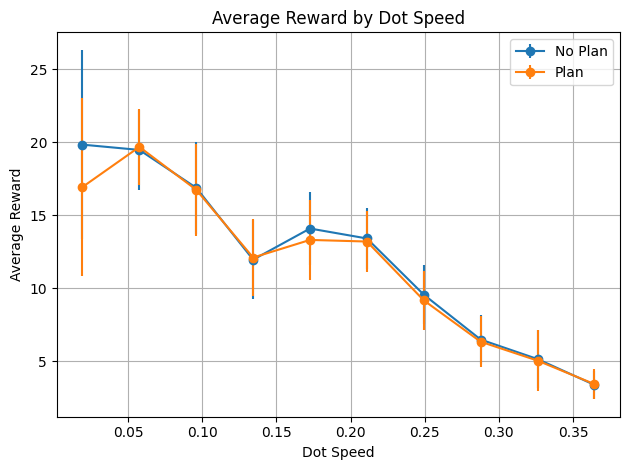

In [14]:
# reward vs speed for plan, no plan

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def compute_rewards_for_speed_bins(dot_array, reward_array, speed_bins):
    # Compute dot speeds for each trial
    dot_diffs = np.diff(dot_array, axis=1)
    dot_speeds = np.linalg.norm(dot_diffs, axis=2)
    trial_mean_dot_speeds = np.mean(dot_speeds, axis=1)

    sbins = len(speed_bins) - 1
    mean_rewards = np.zeros(sbins)
    sem_rewards = np.zeros(sbins)

    for s in range(sbins):
        mask = (trial_mean_dot_speeds >= speed_bins[s]) & (trial_mean_dot_speeds < speed_bins[s + 1])
        rewards_in_bin = reward_array[mask]
        
        if len(rewards_in_bin) > 0:
            mean_rewards[s] = np.mean(rewards_in_bin)
            sem_rewards[s] = np.std(rewards_in_bin) / np.sqrt(len(rewards_in_bin))
            
    return mean_rewards, sem_rewards

reward_arr = np.sum(r_arr, axis=1)
reward_arr_np = np.sum(r_arr_np, axis=1)

# Bin data by dot speed
sbins = 10
speed_bins = np.linspace(0, max(np.max(np.mean(np.linalg.norm(np.diff(dot_arr, axis=1), axis=2))), 
                               np.max(np.mean(np.linalg.norm(np.diff(dot_arr, axis=1), axis=2)))), 
                        num=sbins + 1)

mean_rewards_no_plan, sem_rewards_no_plan = compute_rewards_for_speed_bins(dot_arr_np, reward_arr_np, speed_bins)
mean_rewards_plan, sem_rewards_plan = compute_rewards_for_speed_bins(dot_arr, reward_arr, speed_bins)

# Plotting
fig, ax = plt.subplots()

x_values = (speed_bins[1:] + speed_bins[:-1]) / 2
ax.errorbar(x_values, mean_rewards_no_plan, yerr=1.96*sem_rewards_no_plan, label="No Plan", fmt='o-')
ax.errorbar(x_values, mean_rewards_plan, yerr=1.96*sem_rewards_plan, label="Plan", fmt='o-')

ax.set_xlabel("Dot Speed")
ax.set_ylabel("Average Reward")
ax.set_title("Average Reward by Dot Speed")
ax.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [26]:
# PCA using SVD for plan, no plan

import numpy as np

K = 3

def pca_svd_method(data, K):
    # Reshape the data
    num_samples, T, H = data.shape
    reshaped_data = data.reshape(num_samples*T, H)
    
    # Center the data
    mean_data = np.mean(reshaped_data, axis=0)
    centered_data = reshaped_data - mean_data
    
    # Compute the SVD
    U, S, V = np.linalg.svd(centered_data, full_matrices=False)
    
    # Get the top K columns of V
    V_topK = V.T[:, :K]
    
    # Project data onto the top K PCs
    projected_data = centered_data @ V_topK
    
    # Reshape the projected data back to [1000, 60, K]
    projected_data = projected_data.reshape(num_samples, T, K)
    
    return projected_data

hs_pc_s = pca_svd_method(hs_arr, K)
hv_pc_s = pca_svd_method(hv_arr, K)

hs_pc_s_np = pca_svd_method(hs_arr_np, K)
hv_pc_s_np = pca_svd_method(hv_arr_np, K)

print(hs_pc_s.shape)  # Should print (1000, 60, 3)
print(hv_pc_s.shape)  # Should print (1000, 60, 3)

(500, 60, 3)
(500, 60, 3)


/var/folders/hp/sdqbmwnd5m14lcp1k2qjnkx00000gn/T/ipykernel_7038/377953895.py:104: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  dot.set_data(mod_(dot_arr[i, 0]), mod_(dot_arr[i, 1]))
/var/folders/hp/sdqbmwnd5m14lcp1k2qjnkx00000gn/T/ipykernel_7038/377953895.py:105: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  agent_plan.set_data(mod_(pos_plan_arr[i, 0]), mod_(pos_plan_arr[i, 1]))
/var/folders/hp/sdqbmwnd5m14lcp1k2qjnkx00000gn/T/ipykernel_7038/377953895.py:106: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  agent.set_data(mod_(pos_arr[i, 0]), mod_(pos_arr[i, 1]))


In [39]:
# compare plan/no plan trajectories (plans in black)

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from mpl_toolkits.mplot3d.art3d import Line3DCollection

def plot_combined_trajectories(fig, data1, sample_arr1, data2, sample_arr2, n_list):
    colormaps = ['YlGn', 'RdPu']  # Updated colormaps
    labels = ['With Plan', 'Without Plan']
    
    ax1 = fig.add_subplot(121, projection='3d')
    ax2 = fig.add_subplot(122)
    
    # Buffer for axis limits
    buffer_rate = 0.05
    
    for data, sample_arr, cmap, label in zip([data1, data2], [sample_arr1, sample_arr2], colormaps, labels):
        for idx, n in enumerate(n_list):
            traj = data[n, :, :3]
            length = traj.shape[0]

            transitions = np.where(np.diff(sample_arr[n, :]) != 0)[0]
            if sample_arr[n, 0] == 1:
                transitions = np.insert(transitions, 0, -1)
            if sample_arr[n, -1] == 1:
                transitions = np.append(transitions, length - 2)

            colors = [plt.get_cmap(cmap)(i) if sample_arr[n, i] == 0 else (0, 0, 0, 0.5) for i in range(length)]
            segments_3d = [traj[i:i+2] for i in range(length-1)]
            segments_2d = [s[:, :2] for s in segments_3d]

            lc_3d = Line3DCollection(segments_3d, colors=colors[:-1], label=label if idx == 0 else "")
            lc_2d = LineCollection(segments_2d, colors=colors[:-1], label=label if idx == 0 else "")

            ax1.add_collection(lc_3d)
            ax2.add_collection(lc_2d)

            # Calculating limits with buffer
            min_vals = np.min(traj, axis=0)
            max_vals = np.max(traj, axis=0)
            ranges = max_vals - min_vals
            buffer = buffer_rate * ranges

            ax1.set_xlim(min_vals[0] - buffer[0], max_vals[0] + buffer[0])
            ax1.set_ylim(min_vals[1] - buffer[1], max_vals[1] + buffer[1])
            ax1.set_zlim(min_vals[2] - buffer[2], max_vals[2] + buffer[2])
            
            ax2.set_xlim(min_vals[0] - buffer[0], max_vals[0] + buffer[0])
            ax2.set_ylim(min_vals[1] - buffer[1], max_vals[1] + buffer[1])

            for t in transitions:
                ax1.scatter(*traj[t+1, :3], color='black', s=10)
                ax2.scatter(*traj[t+1, :2], color='black', s=10)

            if sample_arr[n, 0] == 1:
                ax1.scatter(*traj[0, :3], color='black', s=10)
                ax2.scatter(*traj[0, :2], color='black', s=10)
            if sample_arr[n, -1] == 1:
                ax1.scatter(*traj[-1, :3], color='black', s=10)
                ax2.scatter(*traj[-1, :2], color='black', s=10)

    # Set limits based on combined data
    all_data = np.vstack((data1[:, :, :3].reshape(-1, 3), data2[:, :, :3].reshape(-1, 3)))
    ax1.set_xlim(all_data[:, 0].min(), all_data[:, 0].max())
    ax1.set_ylim(all_data[:, 1].min(), all_data[:, 1].max())
    ax1.set_zlim(all_data[:, 2].min(), all_data[:, 2].max())
    ax2.set_xlim(all_data[:, 0].min(), all_data[:, 0].max())
    ax2.set_ylim(all_data[:, 1].min(), all_data[:, 1].max())

    ax1.set_title('3D Trajectories')
    ax1.set_xlabel('PC1')
    ax1.set_ylabel('PC2')
    ax1.set_zlabel('PC3')
    ax2.set_title('2D Projections of Trajectories')
    ax2.set_xlabel('PC1')
    ax2.set_ylabel('PC2')

    ax1.legend()
    ax2.legend()
    plt.show()

# Example usage:
fig = plt.figure(figsize=(12, 6))
n_list = [79]  # Example index, adjust according to your data

plot_combined_trajectories(fig, hs_pc_s, sample_arr, hs_pc_s_np, sample_arr_np, n_list)

# fig = plt.figure(figsize=(12, 6))
# n_list = [79]

# plot_trajectories(fig, hs_pc_s, sample_arr, n_list)
# plot_trajectories(fig, hs_pc_s_np, sample_arr_np, n_list)

/var/folders/hp/sdqbmwnd5m14lcp1k2qjnkx00000gn/T/ipykernel_7038/377953895.py:104: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  dot.set_data(mod_(dot_arr[i, 0]), mod_(dot_arr[i, 1]))
/var/folders/hp/sdqbmwnd5m14lcp1k2qjnkx00000gn/T/ipykernel_7038/377953895.py:105: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  agent_plan.set_data(mod_(pos_plan_arr[i, 0]), mod_(pos_plan_arr[i, 1]))
/var/folders/hp/sdqbmwnd5m14lcp1k2qjnkx00000gn/T/ipykernel_7038/377953895.py:106: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  agent.set_data(mod_(pos_arr[i, 0]), mod_(pos_arr[i, 1]))


(analysis)

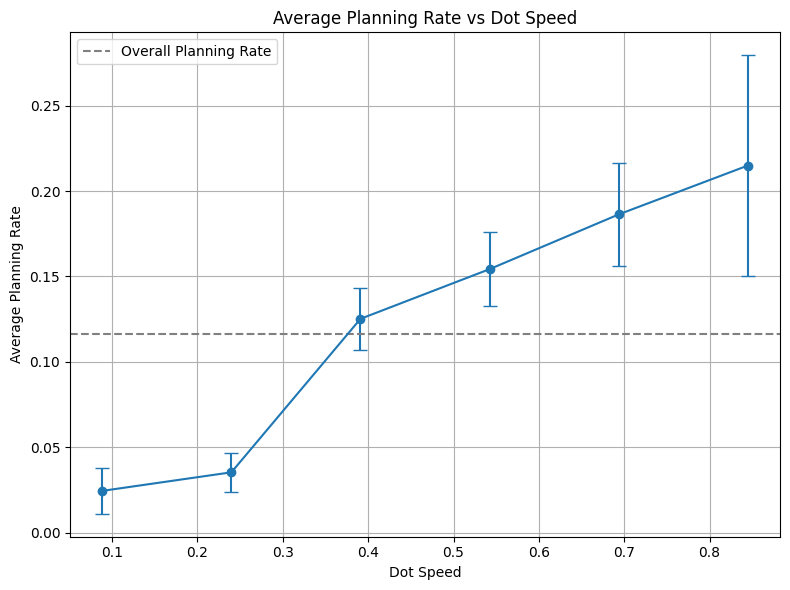

In [12]:
# avg planning rate (masked)

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

sbins = 6

# Calculate dot speeds
dot_diffs = np.diff(dot_arr, axis=1)  # Shape: [1000, 120, 2]
dot_speeds = np.linalg.norm(dot_diffs, axis=2)  # Shape: [1000, 120]
mean_dot_speeds = np.mean(dot_speeds, axis=1)  # Shape: [1000]

# Calculate planning rates using the mask
masked_samples = np.where(mask_arr == 1, sample_arr, np.nan)  # Replace '0's in mask_arr with nan in sample_arr
planning_rates = np.nanmean(masked_samples, axis=1)  # Compute mean ignoring nan values

# Calculate overall planning rate for the dotted line
overall_rate = np.nanmean(masked_samples)

# Define speed bins
speed_bins = np.linspace(np.min(mean_dot_speeds), np.max(mean_dot_speeds), num=sbins +1)
speed_bin_centers = (speed_bins[:-1] + speed_bins[1:]) / 2

# For each speed bin, calculate mean and sem of planning rates
mean_rates = []
sem_rates = []

for i in range(len(speed_bins) - 1):
    mask = (mean_dot_speeds >= speed_bins[i]) & (mean_dot_speeds < speed_bins[i + 1])
    rates_in_bin = planning_rates[mask]
    bin_size = np.sum(mask)
    mean_rates.append(np.nanmean(rates_in_bin))
    sem_rates.append(np.nanstd(rates_in_bin) / np.sqrt(bin_size))

# Plotting
plt.figure(figsize=(8, 6))
plt.errorbar(speed_bin_centers, mean_rates, yerr=1.96*np.array(sem_rates), fmt='o-', capsize=5)
plt.axhline(overall_rate, color='gray', linestyle='--', label="Overall Planning Rate")
plt.xlabel('Dot Speed')
plt.ylabel('Average Planning Rate')
plt.title('Average Planning Rate vs Dot Speed')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
